# Exercise 4

Coded by:
1. Carmen Eitel - carmen.eitel@student.kit.edu

on 01.05.2019

version 1.0

## Bibliotheken und Einstellungen

# TODO: Inhaltsverzeichnis
Vorgehen und kleine Zusammenfassung pro Notebook und Teilaufgabe (Abstract)
data.info()

zielvariable verteilung
missing
skalieren? 


In [1]:
# import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display
import seaborn as sns

## Teilaufgaben

### a) Daten einlesen und erkunden
Lesen Sie den Datensatz Credit.csv ein. Erkunden Sie die Daten und konvertieren Sie gegebenenfalls kategorische Variablen in ein geeignetes Format (z.B. mit pandas.get_dummies() oder sklearn.model_selection.OneHotEncoder()). 

In [2]:
# load dataset
data_raw = pd.read_csv('./data/Credit.csv')

# first insight of data by checking the first 5 data samples
data_raw.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
print('Information about data type: ')
print(data_raw.info())

print('\nInformation about variable Ethnicity:')
data_raw["Ethnicity"].unique()

Information about data type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None

Information about variable Ethnicity:


array(['Caucasian', 'Asian', 'African American'], dtype=object)

Es gibt 400 Samples und keine fehlende Werte.

Es gibt 10 exogene Variablen: 
- Income (float)
- Limit (integer)
- Rating (integer)
- Cards, (integer)
- Age (integer)
- Education (integer)
- Gender (object, dichtomotous)
- Student (object, dichtomotous)
- Married (object, dichtomotous)
- Ethicity (object, categorical with 3 values: Caucasian, Asian, African American)

und eine endogene Variable: 
- Balance (integer).

Die binären Variablen müssen in eine Dummy-Variable mit 1 und 0 bzw. True und False überführt werden. Die kategorische Variable muss in verschiedene Dummy-Variablen entsprechend der Anzahl ihrer Ausprägungen überführt werden (siehe Teilaufgabe c).

Im Folgenden werden die binären Variablen in eine Dummy-Variable überführt zusammen micht den integers und floats in ein Dataframe überführt.

In [4]:
pd.options.mode.chained_assignment = None

# create dummies of gender
gender_df = pd.get_dummies(data_raw["Gender"])

# select one dummy
is_male = gender_df[["Male"]]

#rename column
is_male.rename(columns = {"Male":"IsMale"}, inplace = True)

In [5]:
# create dummies for student
student = pd.get_dummies(data_raw["Student"])

# select one dummy
is_student = student[["Yes"]]

# rename column
is_student.rename(columns = {"Yes":"IsStudent"}, inplace = True)

In [6]:
# create dummies for married
married = pd.get_dummies(data_raw["Married"])

# select one dummy for married
is_married = married[["Yes"]]

# rename column
is_married.rename(columns = {"Yes":"IsMarried"}, inplace = True)

In [7]:
data_without_categorical_binary_variables = data_raw[["Balance","Income", "Limit", "Rating", "Cards", "Age", "Education"]]
data_without_categorical_variables = pd.concat([data_without_categorical_binary_variables, is_married, is_student, is_male], axis=1, join='inner')
data_without_categorical_variables.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,IsMarried,IsStudent,IsMale
0,333,14.891,3606,283,2,34,11,1,0,1
1,903,106.025,6645,483,3,82,15,1,1,0
2,580,104.593,7075,514,4,71,11,0,0,1
3,964,148.924,9504,681,3,36,11,0,0,0
4,331,55.882,4897,357,2,68,16,1,0,1


Im Folgenden werden bereits die Dummies der kategorischen Variablen Ethnicty erstellt und ein geeignetes Dataframe erstellt. Damit wird der Datensplit in b) durchgeführt. Dies ist somit ein Vorzug aus der Teilaufgabe c).

In [8]:
# there are three values for ethnicities: African American, Asian, Caucasian
# convert them into three dummies

ethnicity_raw = pd.Series(data_raw["Ethnicity"], dtype="category") 

# create dummies
african_american = pd.get_dummies(ethnicity_raw == "African American")
asian = pd.get_dummies(ethnicity_raw == "Asian")
caucasian = pd.get_dummies(ethnicity_raw == "Caucasian")

# select one dummy for african_american
is_african_american = african_american[[1]]

# rename column of is_african_american
is_african_american.rename(columns = {True : "IsAfricanAmerican"}, inplace = True)

# select one dummy for asian and caucasian
is_asian = asian[[1]]
is_caucasian = caucasian[[1]]

# rename columns
is_asian.rename(columns = {True : "IsAsian"}, inplace = True)
is_caucasian.rename(columns = {True : "IsCaucasian"}, inplace = True)

In [9]:
# create dataframe with all variables
data = pd.concat([data_without_categorical_variables, is_asian, is_caucasian, is_african_american], axis = 1, join = 'inner')
data.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,IsMarried,IsStudent,IsMale,IsAsian,IsCaucasian,IsAfricanAmerican
0,333,14.891,3606,283,2,34,11,1,0,1,0,1,0
1,903,106.025,6645,483,3,82,15,1,1,0,1,0,0
2,580,104.593,7075,514,4,71,11,0,0,1,1,0,0
3,964,148.924,9504,681,3,36,11,0,0,0,1,0,0
4,331,55.882,4897,357,2,68,16,1,0,1,0,1,0


#### Vertraut werden mit Daten

In [10]:
# print shape of data
data.shape

(400, 13)

Es gibt 400 Samples und 13 Variablen.

In [11]:
# basic statistics of integer values
data.iloc[:,:7].describe()

,Balance,Income,Limit,Rating,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,520.015000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000
std,459.758877,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207
min,0.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000
25%,68.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000
50%,459.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000
75%,863.000000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000
max,1999.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000


Zu erkennen sind die unterschiedlichen Wertebereiche der verschiedenen Variablen. Cards hat beispielsweise einen Wertebereich von 1 bis 9 (25%-Quantil: 2, 75%-Quantil: 4), wohingegen Limit einen Wertebereich von 855 bis 13913 (25%-Quantil: 3088, 75%-Quantil: 5872.75) besitzt. Da lineare Regression und Random Forest angewandt wird, ist eine Sklarierung nicht notwendig. Im Folgenden werden die Kennzahlen der vorherigen Variable zur Verdeutlichung anhand von Boxplots visualisiert.

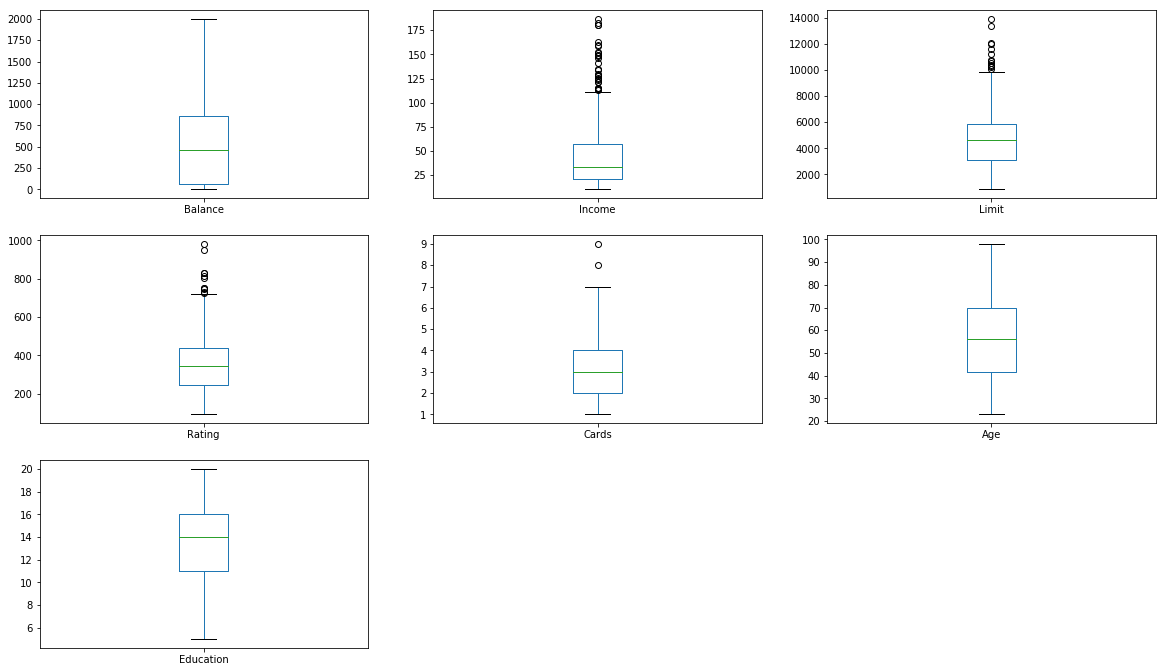

In [12]:
# create boxplot for integer and float data
data.iloc[:, : 7].plot(figsize = (20, 20), kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False);  # show boxplots

Zu erkennen ist, dass Income, Limit und Rating viele Ausreißer nach oben haben. Balance, Age und Education haben eine recht hohe Varianz.

Im Folgenden werden nicht binären Variablen genauer untersucht. Zur Erinnerung: die kategorischen Variablen wurden ihn binäre umgewandelt.

In [13]:
# get binary variables
binary_data = data.iloc[:, 7:]

for col in binary_data.columns:
    print(str(binary_data[col].value_counts()))    

1    245
0    155
Name: IsMarried, dtype: int64
0    360
1     40
Name: IsStudent, dtype: int64
0    207
1    193
Name: IsMale, dtype: int64
0    298
1    102
Name: IsAsian, dtype: int64
0    201
1    199
Name: IsCaucasian, dtype: int64
0    301
1     99
Name: IsAfricanAmerican, dtype: int64


# TODO: plot mit seaborn

Mit 245 zu 155 sind deutlich mehr Personen verheiratet als unverheiratet. Der Anteil an Studenten ist mit 40 zu 360 sehr gering. Zudem ist der Anteil männlicher und weiblicher Personen ungefähr gleich groß. Weiße sind mit 199 Personen deutlich stärker vertreten als Asiaten (102) und Afroamerikaner (99).

Im folgenden wird die Verteilung von der Zielvariablen Balance genauer betrachtet.

# TODO Verteilung balance plotten, max und min daten plotten

### b) Datensatz teilen
Separieren Sie den Datensatz in 80%-20% für Training und Testdatensatz. Was müssen Sie hier beachten?

In [14]:
# split into dependent y and independent X variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [15]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Es muss beachtet werden, dass die Daten geshuffelt und dann separiert werden, sodass die Daten iid sind und beispielsweiße keine unterschiedliche Varianz oä in den zwei Splits vorhanden ist. Insbesondere sollten Testdaten und Trainingsdaten repräsentativ sein. Die Testdaten werden nur am Ende zur Bewertung eines Modells verwendet, nicht zur Training oder Parametertuning.


### c) OLS mit allen Variablen und ohne Limit
Erstellen Sie aus der Variable Ethnicity drei binäre Variablen Ethnicity_Caucasian, Ethnicity_Asian und Ethnicity_African. Führen Sie eine lineare Regression mit OLS als Schätzer mit diesen Variablen und allen anderen Variablen (außer Limit) durch. Berechnen Sie Root Mean Square Error (RMSE) zwischen der Vorhersage und den wahren Werten im Test-Datensatz. Beschreiben Sie Ihre Ergebnisse.

Binäre Variablen wurde bereits in Teilaufgabe a) erstellt. Ethinicity_Caucasian entspricht IsCaucasian, Ethnicity_Asian entspricht IsAsian und Ethnicity_African entspricht IsAfricanAmerican. Dies wurde eingeführt, um die Interpretation der Ausprägungen zu vereinfachen

#### Definieren von Funktionen für lineare Regression mit OLS als Schätzer:

In [16]:
# define function for fitting OLS regression model
def ols_statsmodel(X_train, y_train):
    
    # add intercept
    X_train = sm.add_constant(X_train)
    
    # fit model
    model = sm.OLS(y_train, X_train).fit()
    
    return model
    #display(model.summary())

In [17]:
# define function for prediction with OLS regression model
def predict_ols_statsmodel(X_test, model):
    
    # add intercept
    X_test = sm.add_constant(X_test)
    
    # predict
    y_predict = model.predict(X_test)
    
    return y_predict 
    

In [18]:
# define function to calculate rmse
def calculate_rmse(y_predicted, y_gt):
    rmse = sqrt(mean_squared_error(y_test, y_predicted))
    return rmse

#### Erstellung der Datasets und Modelle:

In [19]:
# create datasets with different variables

# dataset without variable limit
X_train_withoutLimit = X_train.drop(columns="Limit")
X_test_withoutLimit = X_test.drop(columns="Limit")

# create models
model_allVariables = ols_statsmodel(X_train, y_train)
model_withoutLimit = ols_statsmodel(X_train_withoutLimit, y_train)


/home/carmen/anaconda3/envs/python3_7-SmartDataAnalytics/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Ergebnisse:

#### Adjusted R-squared

In [20]:
# print adjusted r-squared
print('Adjusted R-squared of model with all variables: ' + str(round(model_allVariables.rsquared_adj, 3)))
print('Adjusted R-squared of model without limit: ' + str(round(model_withoutLimit.rsquared_adj, 3)))

Adjusted R-squared of model with all variables: 0.954
Adjusted R-squared of model without limit: 0.95


Zunächst einmal werden die Adjusted R-squared verglichen, da die um die Anzahl der verwendeten exogenen Variablen bereinigt ist. Das Modell mit allen Variablen schneidet mit einem Adjusted R-squared von 0,954 ein wenig besser ab, als das ohne Limit mit 0,95.

#### Signifikanz der Koeffizienten

In [21]:
# creating table of p-values
pValues = pd.DataFrame({"With all variables": model_allVariables.pvalues, "Without limit": model_withoutLimit.pvalues})
print('Coefficients of models: ')
display(pValues.round(3))

Coefficients of models: 


,With all variables,Without limit
Age,0.081,0.103
Cards,0.000,0.336
Education,0.554,0.855
Income,0.000,0.000
IsAfricanAmerican,0.000,0.000
IsAsian,0.000,0.000
IsCaucasian,0.000,0.000
IsMale,0.275,0.282
IsMarried,0.606,0.327
IsStudent,0.000,0.000


Nun werden die Koeffizienten untersucht. Die p-Werte zeigen, dass bei dem Modell mit allen Variablen Education, IsMale und IsMarried bei einem Signifikanzniveau von 0,1 nicht signifikant sind. Üblich ist ein Signifikanzniveau von 0,05. Bei letzterem Signifikanzniveau sind auch Rating und Age nicht signifikant.
Bei dem Modell ohne Limit sind Age, Cards, IsMale. IsMarried und Education bereits bei einem Signifikanzniveau 0,1 nicht signifikant sind.

#### Werte der Koeffizienten

In [22]:
# creating table of coefficients
params = pd.DataFrame({"All variables": model_allVariables.params, "Without limit": model_withoutLimit.params})
display(params)

,All variables,Without limit
Age,-0.603695,-0.587846
Cards,19.123826,4.181306
Education,-1.078674,-0.346833
Income,-7.554059,-7.573931
IsAfricanAmerican,-125.589917,-147.741912
IsAsian,-112.294369,-127.308454
IsCaucasian,-114.072764,-133.345157
IsMale,12.493725,12.842603
IsMarried,-6.150365,-12.123810
IsStudent,418.435398,412.661119


Zu erkennen ist, dass sich durch weglassen der Variablen Limit die Werte der Koeffizienten Cards, Education, IsMarried Rating und des Interzepts stark verändern. Auch bei anderen Koeffizienten sind leichte Veränderungen festzuhalten, jedoch werden diese Veränderungen, ohne dass dies statistisch getestet wurde, als weniger wichtig betrachtet. 
Verändungern der Signifikanzen und Werte der Koeffizienten bei weglassen von einzelnen Variablen deuten auf eine Fehlspezifikation bzw. Multikollinearität im Model hin.

#### RMSE zwischen Vorhersage und Ground Truth der Testdaten

In [23]:
# predict 
predicted_allVariables = predict_ols_statsmodel(X_test, model_allVariables)
predicted_withoutLimit = predict_ols_statsmodel(X_test_withoutLimit, model_withoutLimit)

# print rmse
print('RMSE of model with all variables: ' + str(round(calculate_rmse(predicted_allVariables, y_test), 3)))
print('RMSE of model without limit: ' + str(round(calculate_rmse(predicted_withoutLimit, y_test), 3)))
#print('RMSE of model with all variables: ' + str(round(sqrt(model_allVariables.mse_total), 3)))
#print('RMSE of model without limit: ' + str(round(sqrt(model_withoutLimit.mse_total), 3)))

RMSE of model with all variables: 89.302
RMSE of model without limit: 91.426


Der auf drei Nachkommastellen gerundete RMSE der beiden Modelle unterscheidet um ca. 2 Einheiten von Balance. Das Modell mit allen Variablen schneidet dabei besser ab, was mit der Interpretation des Adjusted R-squared übereinstimmt. 

### d) OLS ohne Variable Ethnicity_Caucasian
Führen Sie die Analyse in 4c) erneut durch, ohne die Variable Ethnicity_Caucasian. Vergleichen Sie diese Ergebnisse mit denen aus 4c).

In [24]:
# create datasets
# drop column IsCaucasian, wo = without
X_train_wo_IsCauc = X_train.drop(columns="IsCaucasian") 
X_test_wo_IsCauc = X_test.drop(columns="IsCaucasian")

# drop column Limit
X_train_wo_IsCauc_Lim = X_train_wo_IsCauc.drop(columns="Limit") 
X_test_wo_IsCauc_Lim = X_test_wo_IsCauc.drop(columns="Limit")

# create models
model_wo_IsCauc = ols_statsmodel(X_train_wo_IsCauc, y_train)
model_wo_IsCauc_Lim = ols_statsmodel(X_train_wo_IsCauc_Lim, y_train)

/home/carmen/anaconda3/envs/python3_7-SmartDataAnalytics/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Ergebnisse:

#### Adjusted R-squared

In [25]:
# print adjusted r-squared
print('Adjusted R-sqaured of model with all variables: ' + str(round(model_allVariables.rsquared_adj, 3)))
print('Adjusted R-sqaured of model without limit: ' + str(round(model_withoutLimit.rsquared_adj, 3)))
print('Adjusted R-sqaured of model without isCaucasian: ' + str(round(model_wo_IsCauc.rsquared_adj, 3)))
print('Adjusted R-sqaured of model without limit and isCaucasian: ' + str(round(model_wo_IsCauc_Lim.rsquared_adj, 3)))

Adjusted R-sqaured of model with all variables: 0.954
Adjusted R-sqaured of model without limit: 0.95
Adjusted R-sqaured of model without isCaucasian: 0.954
Adjusted R-sqaured of model without limit and isCaucasian: 0.95


Das Modell mit allen Variablen, sowie das Modell ohne isCaucasian erklären die Streuung der Daten gemessem am adjusted R-squared von 0,954 im Vergleich zu den anderen Modellen mit einem adjusted R-squared von 0,95 besser.

#### Signifikanz der Koeffizienten

In [26]:
# creating table of p-values
pValues = pd.DataFrame({"With all variables": model_allVariables.pvalues, "Without limit": model_withoutLimit.pvalues, "Without isCaucasian": model_wo_IsCauc.pvalues, "Without limit and isCaucasian": model_wo_IsCauc_Lim.pvalues})
print('Coefficients of models: ')
display(pValues.round(3))

Coefficients of models: 


,With all variables,Without limit,Without isCaucasian,Without limit and isCaucasian
Age,0.081,0.103,0.081,0.103
Cards,0.000,0.336,0.000,0.336
Education,0.554,0.855,0.554,0.855
Income,0.000,0.000,0.000,0.000
IsAfricanAmerican,0.000,0.000,0.413,0.326
IsAsian,0.000,0.000,0.898,0.677
IsCaucasian,0.000,0.000,NaN,NaN
IsMale,0.275,0.282,0.275,0.282
IsMarried,0.606,0.327,0.606,0.327
IsStudent,0.000,0.000,0.000,0.000


In [27]:
model_allVariables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     597.4
Date:                Thu, 09 May 2019   Prob (F-statistic):          2.13e-200
Time:                        20:25:32   Log-Likelihood:                -1926.6
No. Observations:                 320   AIC:                             3877.
Df Residuals:                     308   BIC:                             3922.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -351.9570     30.168    -11.667      0.000    -411.318    -292.596
Income               -7.5541      0.277    -27.243      0.000      -8.100      -7.008
Limit                 0.1981      0.037      5.312      0.000       0.125       0.271
Rating                0.9713      0.561      1.733      0.084      -0.132       2.074
Cards                19.1238      5.025      3.805      0.000       9.235      29.012
Age                  -0.6037      0.345     -1.750      0.081      -1.282       0.075
Education            -1.0787      1.822     -0.592      0.554      -4.664       2.507
IsMarried            -6.1504     11.904     -0.517      0.606     -29.573      17.272
IsStudent           418.4354     19.758     21.178      0.000     379.558     457.313
IsMale               12.4937     11.425      1.094      0.275      -9.987      34.975
IsAsian            -112.2944     12.981     -8.651      0.000    -137.836     -86.753
IsCaucasian        -114.0728     12.483     -9.138      0.000    -138.636     -89.510
IsAfricanAmerican  -125.5899     14.012     -8.963      0.000    -153.161     -98.018
==============================================================================
Omnibus:                       18.681   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.945
Skew:                           0.623   Prob(JB):                     2.83e-05
Kurtosis:                       2.870   Cond. No.                     2.48e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# TODO INTERPRETATION evtl residuen plotten

#### Werte der Koeffizienten

In [28]:
# creating table of coefficients
params = pd.DataFrame({"All variables": model_allVariables.params, "Without limit": model_withoutLimit.params, "Without isCaucasian": model_wo_IsCauc.params, "Without limit and isCaucasian": model_wo_IsCauc_Lim.params})
display(params)

,All variables,Without limit,Without isCaucasian,Without limit and isCaucasian
Age,-0.603695,-0.587846,-0.603695,-0.587846
Cards,19.123826,4.181306,19.123826,4.181306
Education,-1.078674,-0.346833,-1.078674,-0.346833
Income,-7.554059,-7.573931,-7.554059,-7.573931
IsAfricanAmerican,-125.589917,-147.741912,-11.517153,-14.396755
IsAsian,-112.294369,-127.308454,1.778395,6.036703
IsCaucasian,-114.072764,-133.345157,NaN,NaN
IsMale,12.493725,12.842603,12.493725,12.842603
IsMarried,-6.150365,-12.123810,-6.150365,-12.123810
IsStudent,418.435398,412.661119,418.435398,412.661119


# TODO INTERPRETATION

#### RMSE zwischen Vorhersage und Ground Truth der Testdaten

In [29]:
# predict 
predicted_wo_isCauc = predict_ols_statsmodel(X_test_wo_IsCauc, model_wo_IsCauc)
predicted_wo_isCauc_lim = predict_ols_statsmodel(X_test_wo_IsCauc_Lim, model_wo_IsCauc_Lim)

# print rmse
print('RMSE of model with all variables: ' + str(round(calculate_rmse(predicted_allVariables, y_test), 3)))
print('RMSE of model without limit: ' + str(round(calculate_rmse(predicted_withoutLimit, y_test), 3)))
print('RMSE of model without isCaucasian: ' + str(round(calculate_rmse(predicted_wo_isCauc_lim, y_test), 3)))
print('RMSE of model without limit and isCaucasian: ' + str(round(calculate_rmse(predicted_wo_isCauc_lim, y_test), 3)))

RMSE of model with all variables: 89.302
RMSE of model without limit: 91.426
RMSE of model without isCaucasian: 91.426
RMSE of model without limit and isCaucasian: 91.426


# TODO: beschreiben und mit 4c vergleichen

### e) OLS mit unterschiedlichen Variablen
Führen Sie eine lineare Regression (OLS) mit folgenden Variablen durch: 
1. Income, Limit, Age
2. Income, Rating, Age
3. Income, Limit, Rating, Age 

Beschreiben Sie die Koeffizienten, Konfidenzintervalle und Signifikanzniveau. Vergleichen Sie die Ergebnisse.

#### Erstellung der Datasets und Modelle:

In [30]:
# create datasets with different variables
# income (inc), limit (lim), age, rating (rat)
X_train_inc_lim_age = X_train[["Income", "Limit", "Age"]]
X_train_inc_rat_age = X_train[["Income", "Rating", "Age"]]
X_train_inc_lim_rat_age = X_train[["Income", "Rating", "Limit", "Age"]]
X_test_inc_lim_age = X_test[["Income", "Limit", "Age"]]
X_test_inc_rat_age = X_test[["Income", "Rating", "Age"]]
X_test_inc_lim_rat_age = X_test[["Income", "Rating", "Limit", "Age"]]

# create models
model_inc_lim_age = ols_statsmodel(X_train_inc_lim_age, y_train)
model_inc_rat_age = ols_statsmodel(X_train_inc_rat_age, y_train)
model_inc_lim_rat_age = ols_statsmodel(X_train_inc_lim_rat_age, y_train)

/home/carmen/anaconda3/envs/python3_7-SmartDataAnalytics/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Ergebnisse:

#### Werte der Koeffizienten

In [31]:
# creating table of coefficients
params = pd.DataFrame({"Income, Limit, Age": model_inc_lim_age.params, "Income, Rating, Age": model_inc_rat_age.params, "Income, Limit, Rating, Age": model_inc_lim_rat_age.params})
display(params)

,"Income, Limit, Age","Income, Rating, Age","Income, Limit, Rating, Age"
Age,-0.820518,-0.881677,-0.854335
Income,-7.329630,-7.330938,-7.389024
Limit,0.260357,NaN,0.101988
Rating,NaN,3.889386,2.381763
const,-333.273816,-478.148061,-424.587171


##### Konfidenzintervalle

In [32]:
# get confidence intervals
confIn_inc_lim_age = pd.DataFrame(model_inc_lim_age.conf_int(0.05))
confIn_inc_rat_age = pd.DataFrame(model_inc_rat_age.conf_int(0.05))
confIn_inc_lim_rat_age = pd.DataFrame(model_inc_lim_rat_age.conf_int(0.05))

# calculate width of confidence intervals
width_confIn_inc_lim_age = confIn_inc_lim_age[1]-confIn_inc_lim_age[0]
width_confIn_inc_rat_age = confIn_inc_rat_age[1]-confIn_inc_rat_age[0]
width_confIn_inc_lim_rat_age = confIn_inc_lim_rat_age[1]-confIn_inc_lim_rat_age[0]

# rename columns
confIn_inc_lim_age.rename(columns = {0:"Income, Limit, Age: 0.025 ", 1: "Income, Limit, Age: 0.975"}, inplace = True)
confIn_inc_rat_age.rename(columns = {0:"Income, Rating, Age: 0.025", 1: "Income, Rating, Age: 0.975"}, inplace = True)
confIn_inc_lim_rat_age.rename(columns = {0:"Income, Limit, Rating, Age: 0.025", 1: "Income, Limit, Rating, Age: 0.975"}, inplace = True)

# create DataFrame for confIns
confIns = pd.concat([confIn_inc_lim_age, confIn_inc_rat_age, confIn_inc_lim_rat_age], axis=1, join='outer')

# display confIns
print("Confidence intervals: ")
display(confIns)

# create DataFrame for widths_confIns
widths_confIns = pd.DataFrame({"Income, Limit, Age":width_confIn_inc_lim_age, "Income, Rating, Age":width_confIn_inc_rat_age, "Income, Limit, Rating, Age":width_confIn_inc_lim_rat_age})

# display widths_confIns
print("Width of confidence intervals: ")
display(widths_confIns)

Confidence intervals: 


/home/carmen/anaconda3/envs/python3_7-SmartDataAnalytics/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,"Income, Limit, Age: 0.025","Income, Limit, Age: 0.975","Income, Rating, Age: 0.025","Income, Rating, Age: 0.975","Income, Limit, Rating, Age: 0.025","Income, Limit, Rating, Age: 0.975"
Age,-1.891570,0.250534,-1.941837,0.178482,-1.909003,0.200333
Income,-8.189807,-6.469453,-8.181468,-6.480407,-8.236621,-6.541427
Limit,0.247789,0.272926,NaN,NaN,0.007311,0.196665
Rating,NaN,NaN,3.703869,4.074903,0.970106,3.793419
const,-403.970593,-262.577038,-551.359133,-404.936989,-512.755269,-336.419073


Width of confidence intervals: 


,"Income, Limit, Age","Income, Rating, Age","Income, Limit, Rating, Age"
Age,2.142104,2.120319,2.109336
Income,1.720354,1.701062,1.695194
Limit,0.025137,NaN,0.189354
Rating,NaN,0.371034,2.823313
const,141.393555,146.422144,176.336196


#### Signifikanz der Koeffizienten

In [33]:
# creating table of p-values
pValues_e = pd.DataFrame({"Income, Limit, Age": model_inc_lim_age.pvalues, "Income, Rating, Age": model_inc_rat_age.pvalues, "Income, Limit, Rating, Age": model_inc_lim_rat_age.pvalues})
print('Coefficients of models: ')
display(pValues_e.round(3))

Coefficients of models: 


,"Income, Limit, Age","Income, Rating, Age","Income, Limit, Rating, Age"
Age,0.133,0.103,0.112
Income,0.000,0.000,0.000
Limit,0.000,NaN,0.035
Rating,NaN,0.000,0.001
const,0.000,0.000,0.000


# TODO interpretieren!!! 

### f) Korrelation
Was ist Korrelation? Wann benutzt man Pearson Korrelation, Spearman Korrelation und Kendalls Tau? Berechnen Sie Korrelationen zwischen allen Variablen im Trainings-Datensatz. Welche Schlussfolgerung können Sie daraus ziehen?

Anmerkung: 

$*$: Multiplikationszeichen

Auszüge aus Ausschitte aus dem Skript zur Vorlesung Statistik für Fortgeschrittene WS 2018/2019 Lehrstuhl für Analytics and Statistics (Prof. Grothe KIT), S. 58-61)
#### Was ist Korrelation?
Korrelation misst die Stärke und Richtung des Zusammenhangs bzw. der Abhängigkeit zwischen zwei Zufallsvariablen. 
Die Korrelation ist nicht mit Kausalität gleichzusetzen, da zwar ein Zusammenhang zwischen zwei Zufallsvariablen möglich ist, ohne dass diese sich direkt beeinflussen.

#### Pearson Korrelation
Das bekannteste skalare Zusammenhangsmaß zweier Zufallsvariablen X und Y ist der Korrelationskoeffizient
nach Bravais-Pearson:

$$Corr(X,Y) = \rho_{BP} = \dfrac{Cov(X,Y)}{\sqrt{X}*\sqrt{Y}}$$

Er misst die Stärke des linearen Zusammenhangs von X und Y und hängt von den
Randverteilungen von X und Y ab. 
Sein Wertebereich ist $[-1,1]$.

#### Spearman Korrelation
Das Korrelationsmaß Spearmans $\rho_S$ ist unabhängig von der Randverteilung und somit ein Rangkorrelationskoeffizient.
$$\rho_S = \dfrac{Cov(F_X(X), F_Y(Y))}{\sqrt{Var(F_X(X))}*\sqrt{F_Y(Y)}} = \dfrac{Cov(U, V)}{\sqrt{Var(U)}*\sqrt{Var(V)}}$$

$F_Z(Z)$ ist die Verteilungsfunktion der Zufallsvariable $Z$

Als Rangkorrelationskoeffizient ist Spearmans's $\rho_S$ invariant gegenüber streng monoton wachsende Transformationen $\alpha(.)$ und $\beta(.)$ der Ränder: 

$$ \rho_{S,X,Y} = \rho_{S,\alpha(x), \beta(Y)} $$

Auch hier ist der Wertebereich $[-1,1]$, jedoch wird nicht die Stärke des linearen Zusammenhangs zwischen den Zufallsvariablen X und Y, sondern zwischen U und V und somit den monotonen Zusammenhangs zwischen X und Y gemessen.


##### Kendalls $\tau$
Seien X, Y Zufallsvariablen mit gemeinsamer Verteilungsfunktion F X,Y und Copula C.
Mit $(X^∗ , Y^∗ )$ bezeichnen wir eine ”unabhängige Kopie” von $(X,Y)$.
Kendalls $\tau$ ist dann definiert durch:

$$\tau = P((X-X^*)((Y-Y^*))>0)-P((X-X^*)((Y-Y^*))<0)$$

Die erste Wahrscheinlichkeit heißt Konkordanz- die zweite Wahrscheinlichkeit Diskordanzwahrscheinlichkeit. Man kann zeigen, dass

$$ \tau = \dfrac{Cov(sign(X-X^*), sign(Y-Y^*))}{\sqrt{Var(sign(X-X^*))}\sqrt{Var(sign(Y-Y^*))}}$$

mit $$sign(z)= \left\{ \begin{array}{c} 1\quad z>0\\0 \quad   z=0\\-1 \quad   z<0 \end{array} \right.$$

Auch Kendalls $\tau$ ist ein Rangkorrelationskoeffizient.

#### Wann verwendet man was
Rangkorrelationsmaße können auch für ordinalskalierte Daten verwendet werden.
Ein linearer Zusammenhang impliziert einen monotonen Zusammenhang. Umgekehrt gilt dies nicht.
Ein Rangkorrelationsmaß ist zudem robuster gegenüber Ausreißer.

#### Berechnungen und Schlussfolgerung

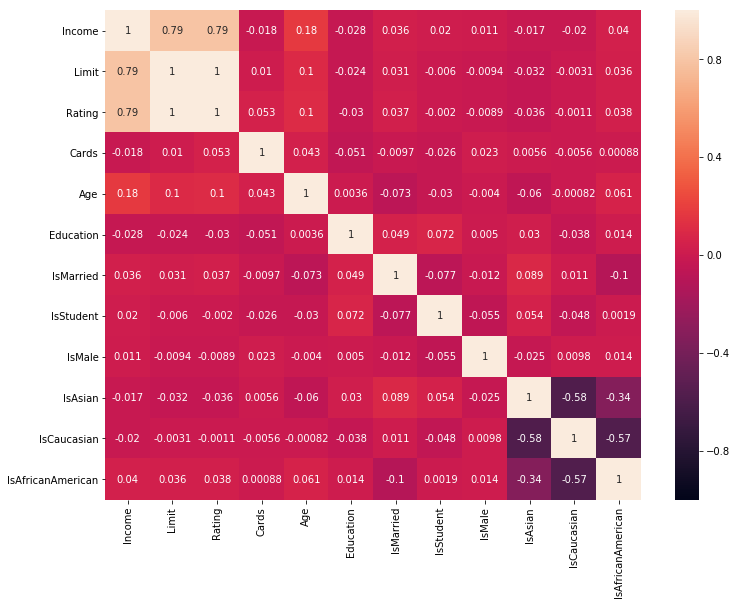

In [39]:
# calculate pearson correlation
corr_pearson = X.corr('pearson')
# set figure size
fig = plt.figure(figsize=(12,9))
# visualize correlation matrix as heatmap
sns.heatmap(corr_pearson,vmin=-1,vmax=1,annot=True)
plt.show()

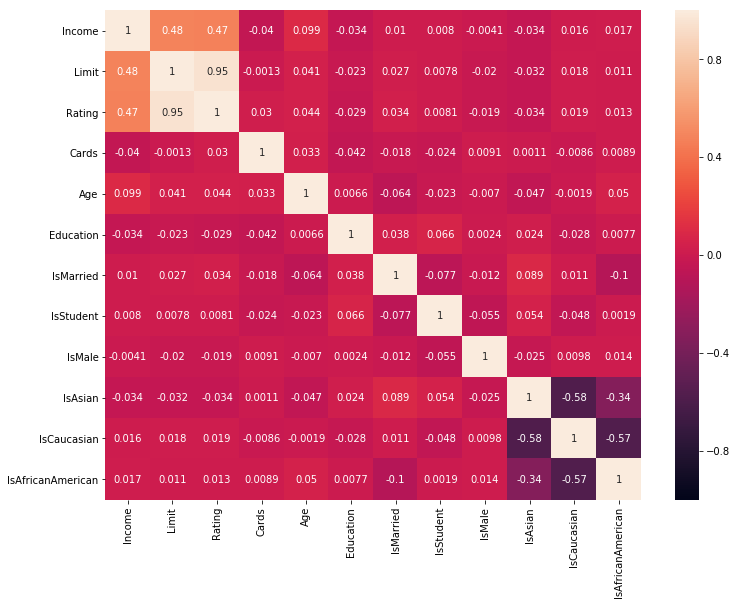

In [35]:
# calculate kendalls correlation
corr_kendall = X.corr('kendall')
# set figure size
fig = plt.figure(figsize=(12,9))
# visualize correlation matrix as heatmap
sns.heatmap(corr_kendall,vmin=-1,vmax=1,annot=True)
plt.show()

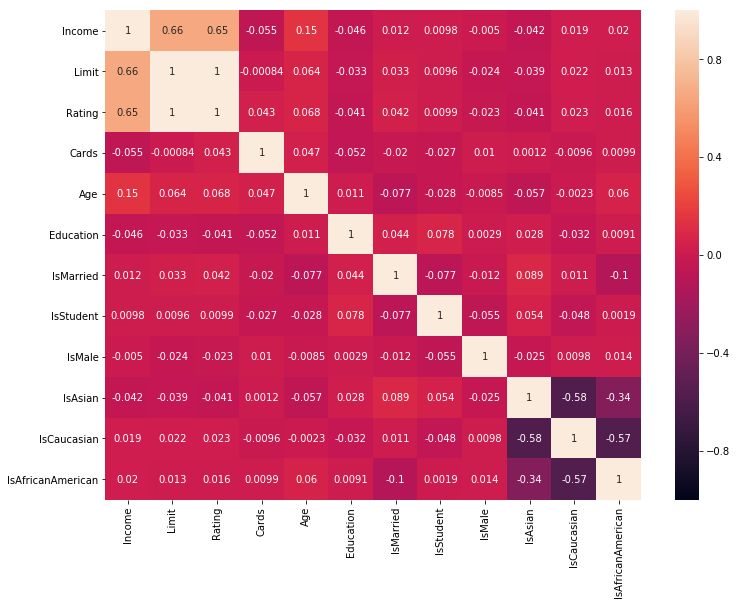

In [40]:
# calculate spearman correlation
corr_spearman = X.corr('spearman')
# set figure size
fig = plt.figure(figsize=(12,9))
# visualize correlation matrix as heatmap
sns.heatmap(corr_spearman,vmin=-1,vmax=1,annot=True)
plt.show()

# TODO: Interpretation rating+limit, 

### g) Random Forest
Führen Sie die Analyse in 4e) mit Random Forest anstatt der linearen Regression durch. Variieren Sie dabei den Parameter random_state mit den Werten {1, 33, 135, 123, 99, 22} und einigen selbst gewählten Werten. Berechnen Sie MSE des Test-Datensatzes. Vergleichen Sie Feature Importance. Welche Schlussfolgerung können Sie daraus ziehen?

In [57]:
# define funcion for random forest
def randomForest(random_state_value, X_train, y_train, X_test, y_test):

    # instantiate model 
    rf = RandomForestRegressor(random_state = random_state_value, n_estimators = 100)

    # train the model on training data
    rf.fit(X_train, y_train)
   
    # Use the forest's predict method on the test data
    y_pred = rf.predict(X_test)

    # calculate the root mean squared error
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    # returns the mean accuracy on the given test data and labels.
    score = rf.score(X_test, y_test)
    
    # calculate feature importances
    feature_importances = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns = ['importance']).sort_values('importance', ascending=False) 

    return rmse, score, feature_importances

In [102]:
# list with random states
random_states = [1, 2, 22, 33, 99, 123, 135, 200]

# for loop over random states
for random_state in random_states:
    
    # fit models and get mean accuray, rmse and feature importances of each model
    rmse_inc_lim_age, score_inc_lim_age, feature_importances_inc_lim_age = randomForest(random_state, 
                                                                                        X_train_inc_lim_age, y_train, 
                                                                                        X_test_inc_lim_age , y_test)
    rmse_inc_rat_age, score_inc_rat_age, feature_importances_inc_rat_age = randomForest(random_state, 
                                                                                        X_train_inc_rat_age, y_train, 
                                                                                        X_test_inc_rat_age, y_test)    
    rmse_inc_lim_rat_age, score_inc_lim_rat_age, feature_importances_inc_lim_rat_age = randomForest(random_state, 
                                                                                                    X_train_inc_lim_rat_age, y_train, 
                                                                                                    X_test_inc_lim_rat_age, y_test)
    # create DataFrame out of Series for nice graphics of metrics mean accuracy and rmse
    rf_metrics_inc_lim_age = pd.Series([rmse_inc_lim_age, score_inc_lim_age], index = ["rmse", "mean accuracy"])
    rf_metrics_inc_rat_age = pd.Series([rmse_inc_rat_age, score_inc_rat_age], index = ["rmse", "mean accuracy"])
    rf_metrics_inc_lim_rat_age = pd.Series([rmse_inc_lim_rat_age, score_inc_lim_rat_age], 
                                           index = ["rmse", "mean accuracy"])
    rfs_metrics = pd.DataFrame({"Income, Limit, Age" : rf_metrics_inc_lim_age, 
                                "Income, Rate, Age" : rf_metrics_inc_rat_age, 
                                "Income, Limit, Rate, Age" : rf_metrics_inc_lim_rat_age}, 
                               index = ["rmse", "mean accuracy"])
    
    # display metrics
    print("Random state = " + str(random_state))
    display(rfs_metrics)
    
    # create DataFrame out of Series for nice graphics feature importances
    feature_importances = pd.concat([feature_importances_inc_lim_age, 
                                     feature_importances_inc_rat_age, 
                                     feature_importances_inc_lim_rat_age], 
                                    axis=1, join='outer', sort=True)
    
    # display feature importances
    display(feature_importances)
    
    # empty line for nicer representation
    print("\n")

    
    

Random state = 1


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,177.617695,180.161726,174.859170
mean accuracy,0.811173,0.805725,0.816992


,importance,importance,importance
Age,0.021104,0.021707,0.016249
Income,0.099518,0.107055,0.091219
Limit,0.879378,NaN,0.423724
Rating,NaN,0.871238,0.468808




Random state = 2


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,180.944496,183.238651,180.169019
mean accuracy,0.804033,0.799032,0.805709


,importance,importance,importance
Age,0.020447,0.020956,0.016712
Income,0.099073,0.108749,0.090831
Limit,0.880480,NaN,0.371165
Rating,NaN,0.870295,0.521291




Random state = 22


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,179.230071,185.505067,182.85198
mean accuracy,0.807729,0.794030,0.79988


,importance,importance,importance
Age,0.021427,0.022446,0.016983
Income,0.101054,0.109747,0.092392
Limit,0.877519,NaN,0.401303
Rating,NaN,0.867808,0.489323




Random state = 33


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,180.856832,182.468679,181.814714
mean accuracy,0.804223,0.800718,0.802144


,importance,importance,importance
Age,0.020132,0.021528,0.016008
Income,0.098907,0.108616,0.091388
Limit,0.880962,NaN,0.384833
Rating,NaN,0.869857,0.507771




Random state = 99


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,179.353408,182.270097,180.287137
mean accuracy,0.807464,0.801151,0.805454


,importance,importance,importance
Age,0.022009,0.021815,0.017592
Income,0.096700,0.104708,0.086837
Limit,0.881291,NaN,0.472643
Rating,NaN,0.873477,0.422928




Random state = 123


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,181.900796,183.590729,178.864465
mean accuracy,0.801956,0.798259,0.808513


,importance,importance,importance
Age,0.020189,0.021678,0.017338
Income,0.100784,0.106665,0.092119
Limit,0.879026,NaN,0.390203
Rating,NaN,0.871656,0.500340




Random state = 135


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,178.989825,184.834251,178.179485
mean accuracy,0.808244,0.795517,0.809976


,importance,importance,importance
Age,0.020488,0.022088,0.016934
Income,0.100146,0.109599,0.091951
Limit,0.879366,NaN,0.433896
Rating,NaN,0.868313,0.457219




Random state = 200


,"Income, Limit, Age","Income, Rate, Age","Income, Limit, Rate, Age"
rmse,181.225271,183.485941,177.850196
mean accuracy,0.803424,0.798489,0.810678


,importance,importance,importance
Age,0.020386,0.020927,0.016604
Income,0.100419,0.109708,0.091528
Limit,0.879195,NaN,0.391144
Rating,NaN,0.869366,0.500724


# Todo: conclude

### h) Multikollinearität
Was ist Multikollinearität? Was sind ihre möglichen Ursachen und Auswirkungen? Wie kann man sie erkennen? Welche Maßnahmen gibt es, wenn Variablen in den Daten kollinear sind?

Multikollinearität liegt vor, wenn zwei oder mehr erklärende Variablen hoch untereinander korreliert sind. Mit zunehmender Multikollinearität wird das Verfahren um die Regressionsparameter zu schätzen instabil und die Interpretation des Modells uneindeutig. Zwar ist der Schätzer im Falle hoher Multikollinearität immer noch BLU (best linear unbiased), jedoch sind die Koeffizienten sehr ungenau geschätzt und das Konfindenzinterval zwar gültig, jedoch sehr breit. Dies ist darauf zurückzuführen, dass der Einfluss der einzelnen Variablen schlecht isoliert werden kann.
Instabile Koeffizienten können u.a. folgende Konsequenzen haben:
- Die Koeffizienten sind anscheinend nicht signifikant, selbst wenn eine signifikante Beziehung zwischen dem Prädiktor und der Antwortvariablen besteht. Erkennbar wird dies z.B. durch ein hohes Bestimmtheitsmaß (z.B. $R²$) zusammen mit wenig Signifikanz für die Regressionsparameter
- Die Koeffizienten für stark korrelierte Prädiktoren variieren erheblich von Stichprobe zu Stichprobe.
- Das Entfernen von stark korrelierten Termen aus dem Modell hat schwerwiegende Auswirkungen auf die geschätzten Koeffizienten der anderen stark korrelierten Terme. Die Koeffizienten der stark korrelierten Terme können sogar ein falsches Vorzeichen aufweisen.

Zudem kann man Multikollinearität anhand der paarweise Korrelation zwischen den Regressoren (größer 0,7 oder 0,8) Multikollinearität erkennen. Eine weitere Möglichkeit sind Hilfsregressionen, bei denen die erklärenden Variablen aufeinander regressiert werden. Je höher das $R²$ dieser Hilsregression, desto größer das Multikollinearitätsproblem.

Perfekte Mulikollinearität (exakte lineare Beziehung zwischen Regressoren) führt dazu, dass die Durchführung der linearen Regressionsalanyse unmöglich wird.

Ursache perfekter Multikollinearität sind beispielsweise falsch verwendete Dummyvariablen, also z.B. eine Variable isStudent und eine isNotStudent. Ursachen für beinahe Mutlikollinearität sind gemeinsame Trends oder zu viele erklärende Variablen, die fast dasselbe messen.

Probleme: Insbesondere bei der Schätzung des Einflusses der erklärenden Variable auf die abhängige Variable liegt ein Problem vor. 

Maßnahmen:
- Transformation der Variablen: beispielsweise Bildung erster Differenzen bei trendbehafteten Zeitreihen
- Variable weglassen (kann gefährlich werden: wenn beispielsweise Raucher ihr Handy in der Hosentasche aufbewahren, da eine andere Taschen der Kleidung mit der Zigarrettenschachtel belegt ist. Würde man nun die Variable istRaucher weglassen und bestimmen, ob und welchen Zusammenhang das Handy in der Hosentasche auf das Krebsrisiko hat, könnten schnell falsche Schlüsse gezogen werden)
- Verwenden der Hauptkompontenanalyse zur Verringer


(https://www.uibk.ac.at/econometrics/einf/kap08la.pdf, https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/, https://support.minitab.com/de-de/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/multicollinearity-in-regression/)
